In [1]:
#Biblioteca para manipulação e análise de dados
import pandas as pd
import numpy as np
from scipy import stats


#Biblioteca para gerar os gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Biblioteca para pré-processamento e machine learning
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import QuantileTransformer
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

# PREDIÇÃO DE TRANSAÇÃO PARA INSTITUIÇÃO FINANCEIRA

## Importação dos datasets

In [115]:
#https://www.kaggle.com/c/santander-customer-transaction-prediction/data
#train.csv - datase para treinamento do modelo.
train = pd.read_csv("input_train/train.csv")
#test.csv - dataset para teste do modelo
test = pd.read_csv("input_test/test.csv")

## Processamento/Tratamento de Dados

### Visualizando os dados

In [12]:
print("O dataset de treinamento possui %s linhas e %s colunas" %(train.shape[0],train.shape[1]))
print("O dataset de teste possui %s linhas e %s colunas" %(test.shape[0],test.shape[1]))

O dataset de treinamento possui 200000 linhas e 201 colunas
O dataset de teste possui 200000 linhas e 200 colunas


In [4]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


### Verificar se há valores nulos

In [6]:
#verificando valores nulos
print("No dataset de treinamento temos a seguinte quantidade de valores nulos:%s " % (train.isnull().sum().sum()))
print("No dataset de teste temos a seguinte quantidade de valores nulos:%s " % (test.isnull().sum().sum()))

No dataset de treinamento temos a seguinte quantidade de valores nulos:0 
No dataset de teste temos a seguinte quantidade de valores nulos:0 


### Verificar se há linhas duplicadas

In [7]:
#verificar se há linhas duplicadas
print("Duplicados no dataset de treinamento? %s" % (any(train['ID_code'].duplicated())))
print("Duplicados no dataset de treinamento? %s" % (any(test['ID_code'].duplicated())))

Duplicados no dataset de treinamento? False
Duplicados no dataset de treinamento? False


### Tranformando a Varíável 'ID_code' em indíce do dataset

In [116]:
#tranformando a coluna "ID_code" em índice do dataset
train = train.set_index('ID_code')
test = test.set_index('ID_code')

### Balancemento do dataset de treinamento

In [9]:
#verificando o balanceamento do Dataset
count_class_0, count_class_1 = train.target.value_counts()
print("Quantidade de linhas no dataset de Treino com target = 0 : %s" % 
      (count_class_0))
print("Quantidade de linhas no dataset de Treino com target = 1 : %s" % 
      (count_class_1))
print("Percentual de linhas no dataset de Treino com target = 0 : %s" % 
      ((count_class_0  / (count_class_1 + count_class_0) * 100)))
print("Percentual de linhas no dataset de Treino com target = 1 : %s" % 
      ((count_class_1  / (count_class_1 + count_class_0) * 100)))


Quantidade de linhas no dataset de Treino com target = 0 : 179902
Quantidade de linhas no dataset de Treino com target = 1 : 20098
Percentual de linhas no dataset de Treino com target = 0 : 89.95100000000001
Percentual de linhas no dataset de Treino com target = 1 : 10.049


## Plot do balaceamento do dataset de treinamento

Text(0, 0.5, 'Quantidade')

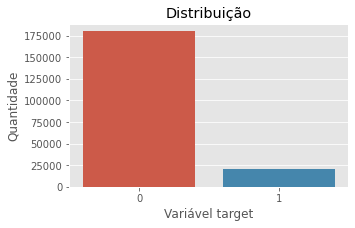

In [13]:
#Plot da distribuição da variável target
plt.style.use("ggplot")
plt.figure(figsize = (5, 3))
sns.countplot('target', data=train);
plt.title("Distribuição")
plt.xlabel("Variável target")
plt.ylabel("Quantidade")

### Modelo para vericação da predição da variável resposta

In [14]:
X = train.drop("target", axis = 1)
y = train.target

In [15]:
def LogisticRegressionModel(X,y):
    lr = LogisticRegression(C=1.0, solver='lbfgs')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)
    lr.fit(X_train, y_train)
   
    y_pred = lr.predict(X_test)
    print("************Classification Report***************")
    print (classification_report(y_test, y_pred))
    print("************Confusion Matrix***************")
    print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))
    print("************Acuracia***************")
    print("A acurácia do modelo é:%s" % (accuracy_score(y_test, y_pred)))

In [16]:
LogisticRegressionModel(X,y)

************Classification Report***************
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44975
           1       0.69      0.24      0.35      5025

    accuracy                           0.91     50000
   macro avg       0.81      0.61      0.65     50000
weighted avg       0.90      0.91      0.89     50000

************Confusion Matrix***************
Predito      0     1    All
Real                       
0        44451   524  44975
1         3833  1192   5025
All      48284  1716  50000
************Acuracia***************
A acurácia do modelo é:0.91286


## Aplicando balancemanento simples

In [41]:
#utilizando a proporção 2:1
train_1 = train[train['target']==1]
train_0 = train[train['target']==0].sample(train_1.shape[0]*2)
train_balanced = train_1.append(train_0)

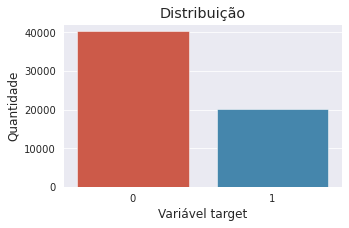

In [42]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize = (5, 3))
    ax = sns.countplot('target', data=train_balanced);
    plt.title("Distribuição")
    plt.xlabel("Variável target")
    plt.ylabel("Quantidade")

In [43]:
X = train_balanced.drop("target", axis = 1)
y = train_balanced.target

In [44]:
LogisticRegressionModel(X,y)

************Classification Report***************
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     10049
           1       0.73      0.60      0.66      5025

    accuracy                           0.79     15074
   macro avg       0.78      0.75      0.76     15074
weighted avg       0.79      0.79      0.79     15074

************Confusion Matrix***************
Predito      0     1    All
Real                       
0         8959  1090  10049
1         2008  3017   5025
All      10967  4107  15074
************Acuracia***************
A acurácia do modelo é:0.794480562558047


## NearMiss
- NearMiss – É um algoritmo de undersampling que consiste em reduzir de forma aleatória os exemplos da classe majoritária, porém ele seleciona os exemplos com base na distância. 
- Undersampling – Consiste em reduzir de forma aleatória os exemplos da classe majoritária
- Quando instâncias das duas classes estão muito próximas umas das outras, removemos as instâncias da classe majoritária para termos uma maior separabilidade entre as classes.
https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/

In [45]:
#Aplica o NearMiss
X = train.drop("target", axis = 1)
y = train.target
#from imblearn.under_sampling import NearMiss
nr = NearMiss(sampling_strategy='auto', version=1, n_neighbors=1, n_neighbors_ver3=1, n_jobs=8)
X, y = nr.fit_resample(X, y)

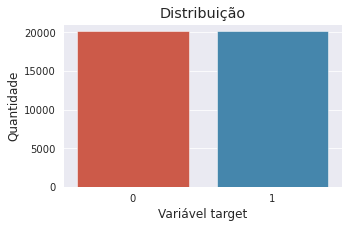

In [46]:
with sns.axes_style("darkgrid"):

#plt.style.use("ggplot")
    plt.figure(figsize = (5, 3))
    ax = sns.countplot(x=y)
    plt.title("Distribuição")
    plt.xlabel("Variável target")
    plt.ylabel("Quantidade")

In [48]:
LogisticRegressionModel(X,y)

************Classification Report***************
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      5024
           1       0.76      0.74      0.75      5025

    accuracy                           0.75     10049
   macro avg       0.75      0.75      0.75     10049
weighted avg       0.75      0.75      0.75     10049

************Confusion Matrix***************
Predito     0     1    All
Real                      
0        3859  1165   5024
1        1305  3720   5025
All      5164  4885  10049
************Acuracia***************
A acurácia do modelo é:0.7542043984476067


## Smote

-Smote: Consiste em gerar dados sintéticos (não duplicados) da classe minoritária
a partir
de vizinhos. 

-Oversampling: Consiste em replicar dados aleatórios da classe minoritária.
Como estamos duplicando os dados já existentes este método está propício 
a dar overfitting. 

-Ele calcula quais são os vizinhos mais próximos e as características desses
vizinhos para criar novos dados. Se o número de dados gerados for muito grande
podemos ter um overfiting.
https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/

In [49]:
X = train.drop("target", axis = 1)
y = train.target
smt = SMOTE()
X, y = smt.fit_sample(X, y)

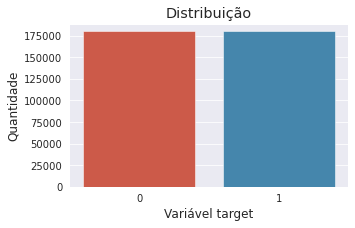

In [50]:
with sns.axes_style("darkgrid"):

#plt.style.use("ggplot")
    plt.figure(figsize = (5, 3))
    ax = sns.countplot(x=y)
    plt.title("Distribuição")
    plt.xlabel("Variável target")
    plt.ylabel("Quantidade")

In [51]:
LogisticRegressionModel(X,y)

************Classification Report***************
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     44975
           1       0.78      0.80      0.79     44976

    accuracy                           0.79     89951
   macro avg       0.79      0.79      0.79     89951
weighted avg       0.79      0.79      0.79     89951

************Confusion Matrix***************
Predito      0      1    All
Real                        
0        35001   9974  44975
1         8940  36036  44976
All      43941  46010  89951
************Acuracia***************
A acurácia do modelo é:0.7897299640915609


# Análise e Exploração dos Dados

### Principais estatisticas do dataset de Train e Test

In [52]:
base = train[train['target']==0].drop('target', axis = 1).describe().T
base = pd.DataFrame(base)
base['base'] = 'train_0'
base['data'] = 'train'
dados = base


base = train[train['target']==1].drop('target', axis = 1).describe().T
base = pd.DataFrame(base)
base['base'] = 'train_1'
base['data'] = 'train'
dados = dados.append(base)


base = test.describe().T
base = pd.DataFrame(base)
base['base'] = 'test'
base['data'] = 'test'

dados = dados.append(base)
dados = dados.drop("count", axis = 1)
dados = dados.reset_index()
dados = dados.rename(columns={'index':'var'})

In [53]:
#Informações estatisticas do dataset Train e Test
dados.head(5)

,var,mean,std,min,25%,50%,75%,max,base,data
0,var_0,10.626681,3.008564,0.4084,8.429500,10.4786,12.693075,20.3150,train_0,train
1,var_1,-1.695770,4.024813,-15.0434,-4.790775,-1.6826,1.287700,10.3768,train_0,train
2,var_2,10.665876,2.612961,2.1171,8.698025,10.5290,12.463900,19.3530,train_0,train
3,var_3,6.788979,2.040082,-0.0402,5.247625,6.8170,8.317875,13.1883,train_0,train
4,var_4,11.072412,1.620103,5.0748,9.880600,11.1044,12.253100,16.6714,train_0,train


### Médias gerais das variáveis preditoras e distribuição

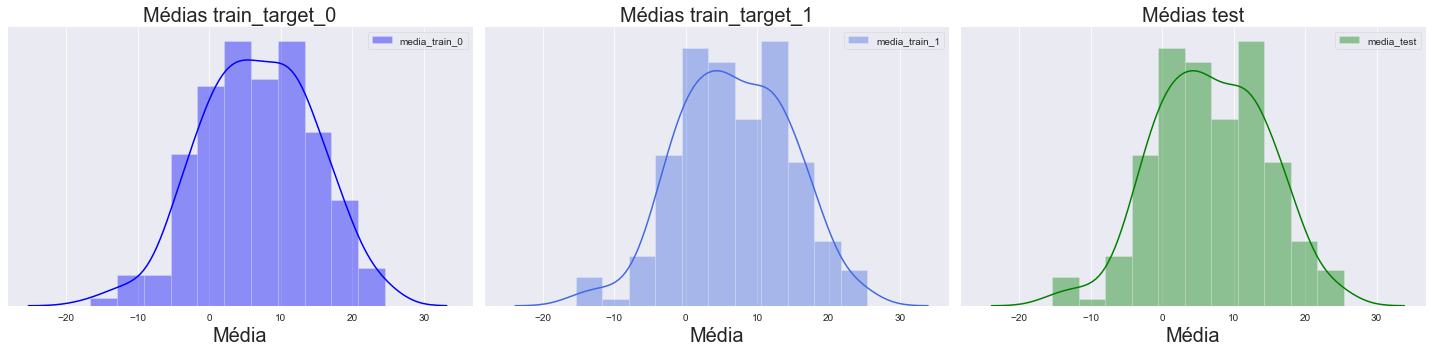

In [54]:
#https://www.kaggle.com/allunia/santander-customer-transaction-eda
with sns.axes_style("darkgrid"):

    media_train_0 = dados[dados['base']=='train_0']['mean']
    media_train_1 = dados[dados['base']=='train_1']['mean']
    media_test = dados[dados['base']=='train_1']['mean']

    f, (ax1,ax2,ax3)= plt.subplots(1,3, figsize=(20,5), sharex=True)

    sns.distplot(media_train_0, color="Blue", label="media_train_0", ax = ax1)
    ax1.set_title("Médias train_target_0",size=20)
    ax1.set_xlabel("Média",size=20)
    ax1.legend();

    sns.distplot(media_train_1, color="royalblue", label="media_train_1", ax = ax2)
    ax2.set_title("Médias train_target_1",size=20)
    ax2.set_xlabel("Média",size=20)
    ax2.legend();

    sns.distplot(media_test, color="Green", label="media_test", ax = ax3)
    ax3.set_title("Médias test",size=20)
    ax3.set_xlabel("Média",size=20)
    ax3.legend();

    # Finalize the plot
    sns.despine(bottom=True)
    plt.setp(f.axes, yticks=[])
    plt.tight_layout(h_pad=2)
    plt.show()

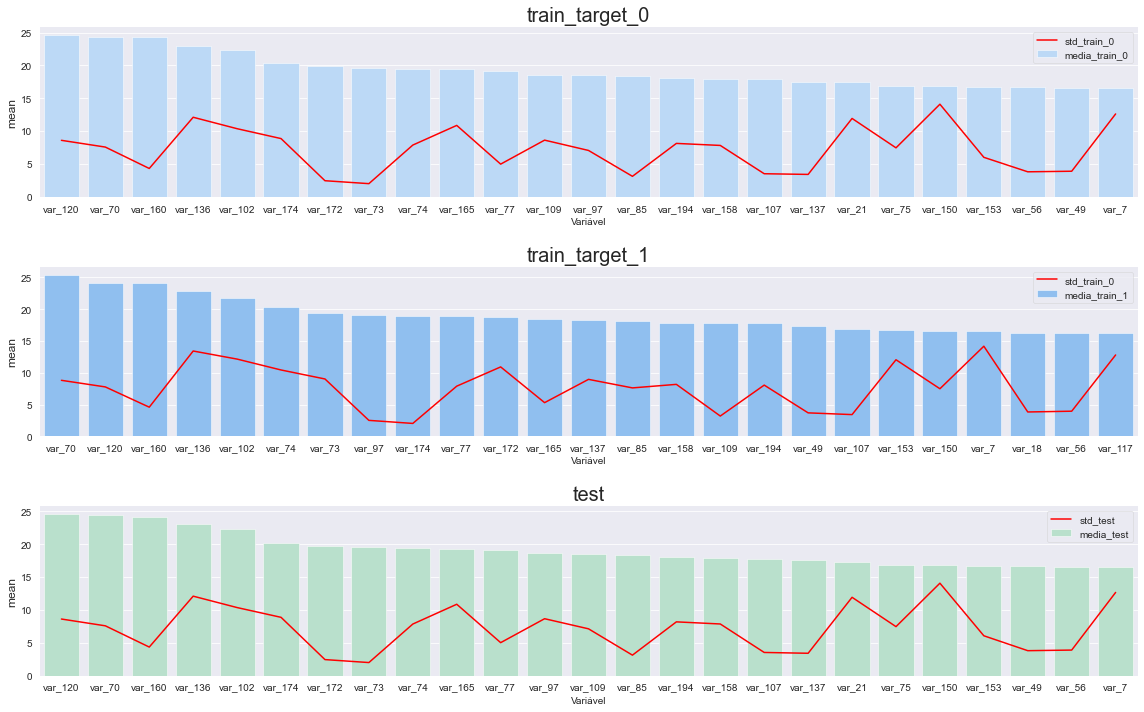

In [55]:
#plot maiores médias

with sns.axes_style("darkgrid"):
    
    media_train_0 = dados[dados['base']=='train_0'].sort_values(by='mean', ascending=False).head(25)
    media_train_1 = dados[dados['base']=='train_1'].sort_values(by='mean', ascending=False).head(25)
    media_test = dados[dados['base']=='test'].sort_values(by='mean', ascending=False).head(25)
    
    f, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(16,10))#, sharex=True)

    ax1 = sns.lineplot(x="var", y="std",data=media_train_0,label="std_train_0",color="red", ax = ax1)
    ax1 = sns.barplot(x="var", y="mean",data=media_train_0,label="media_train_0",color="#b3d9ff", ax = ax1)
    
    ax1.set_title("train_target_0",size=20)
    ax1.set_xlabel("Variável",size=10)
    ax1.legend();
    
    ax2 = sns.lineplot(x="var", y="std",data=media_train_1,label="std_train_0",color="red", ax = ax2)
    ax2 = sns.barplot(x="var", y="mean",data=media_train_1,label="media_train_1",color="#80bfff", ax = ax2)
    
    ax2.set_title("train_target_1",size=20)
    ax2.set_xlabel("Variável",size=10)
    ax2.legend();
    
    ax3 = sns.lineplot(x="var", y="std",data=media_test,label="std_test",color="red", ax = ax3)
    ax3 = sns.barplot(x="var", y="mean",data=media_test,label="media_test",color="#b3e6cc", ax = ax3)
    
    ax3.set_title("test",size=20)
    ax3.set_xlabel("Variável",size=10)
    ax3.legend();



    # Finalize the plot
    sns.despine(bottom=True)
    #plt.setp(f.axes, yticks=[])
    plt.tight_layout(h_pad=2)
    plt.show()

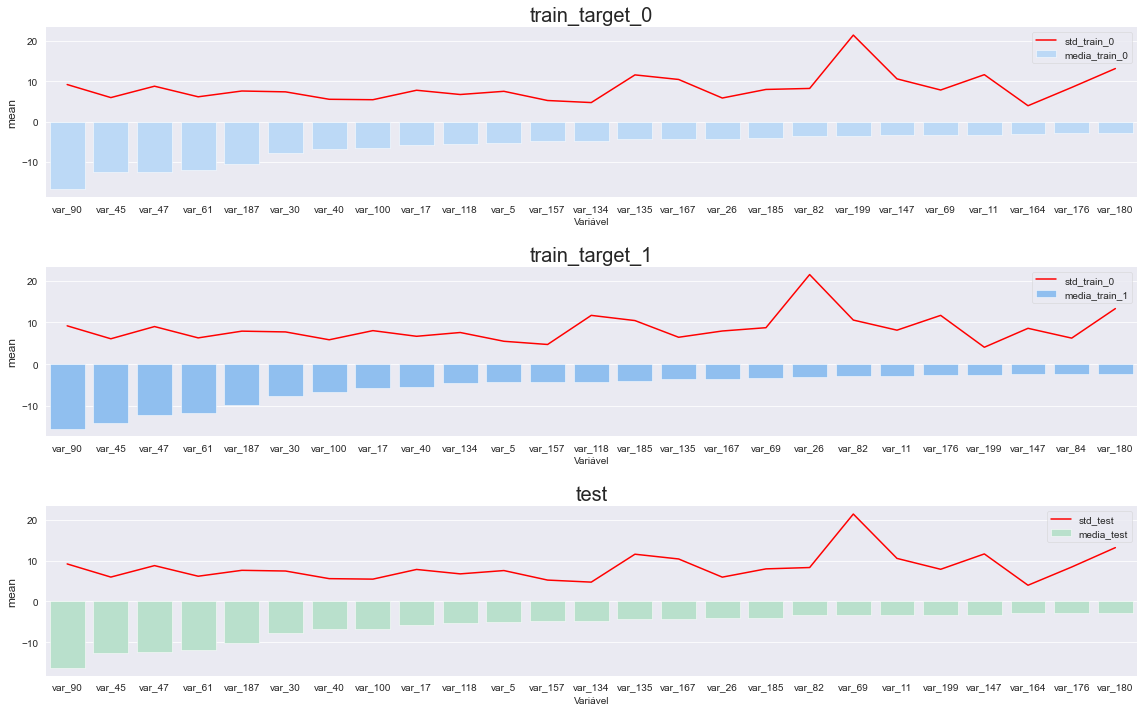

In [56]:
#plot menores médias

with sns.axes_style("darkgrid"):
    
    media_train_0 = dados[dados['base']=='train_0'].sort_values(by='mean', ascending=True).head(25)
    media_train_1 = dados[dados['base']=='train_1'].sort_values(by='mean', ascending=True).head(25)
    media_test = dados[dados['base']=='test'].sort_values(by='mean', ascending=True).head(25)
    
    f, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(16,10))#, sharex=True)

    sns.lineplot(x="var", y="std",data=media_train_0,label="std_train_0",color="red", ax = ax1)
    sns.barplot(x="var", y="mean",data=media_train_0,label="media_train_0",color="#b3d9ff", ax = ax1)
    
    ax1.set_title("train_target_0",size=20)
    ax1.set_xlabel("Variável",size=10)
    ax1.legend();
    
    sns.lineplot(x="var", y="std",data=media_train_1,label="std_train_0",color="red", ax = ax2)
    sns.barplot(x="var", y="mean",data=media_train_1,label="media_train_1",color="#80bfff", ax = ax2)
    
    ax2.set_title("train_target_1",size=20)
    ax2.set_xlabel("Variável",size=10)
    ax2.legend();
    
    sns.lineplot(x="var", y="std",data=media_test,label="std_test",color="red", ax = ax3)
    sns.barplot(x="var", y="mean",data=media_test,label="media_test",color="#b3e6cc", ax = ax3)
    
    ax3.set_title("test",size=20)
    ax3.set_xlabel("Variável",size=10)
    ax3.legend();



    # Finalize the plot
    sns.despine(bottom=True)
    #plt.setp(f.axes, yticks=[])
    plt.tight_layout(h_pad=2)
    plt.show()

## Desvio Padrão

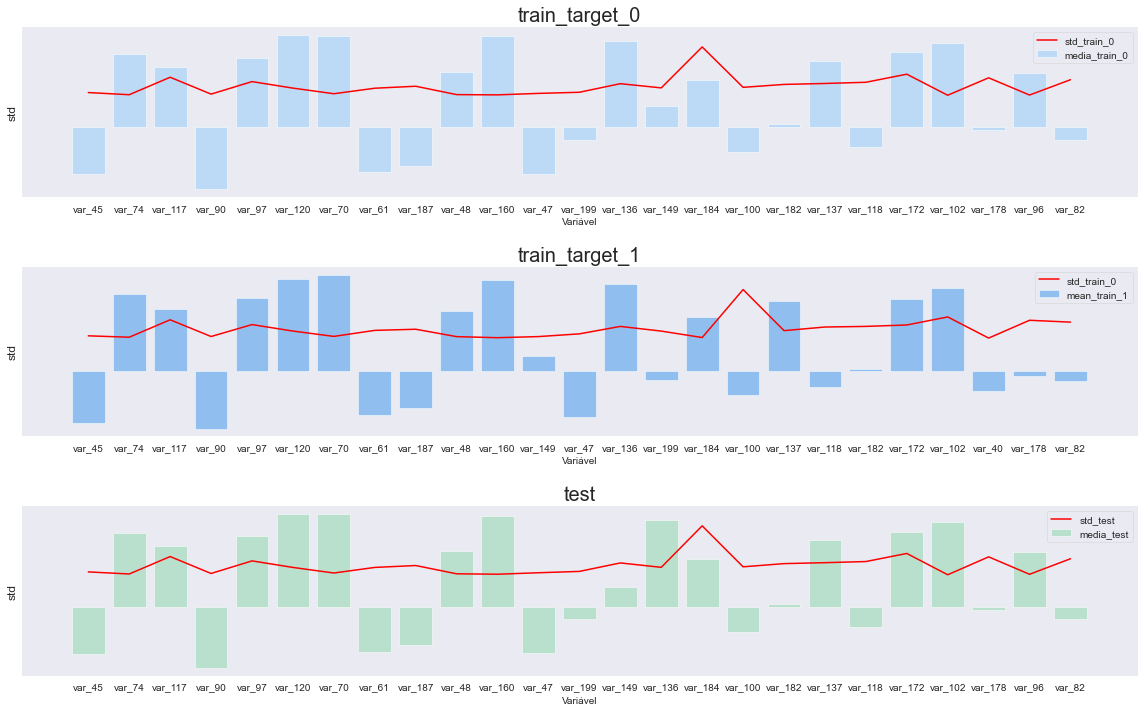

In [57]:
#plot maiores médias

with sns.axes_style("darkgrid"):
    
    media_train_0 = dados[dados['base']=='train_0'].sort_values(by='std', ascending=False).head(25)
    media_train_1 = dados[dados['base']=='train_1'].sort_values(by='std', ascending=False).head(25)
    media_test = dados[dados['base']=='test'].sort_values(by='std', ascending=False).head(25)
    
    f, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(16,10))#, sharex=True)

    
    sns.barplot(x="var", y="mean",data=media_train_0,label="media_train_0",color="#b3d9ff", ax = ax1)
    sns.lineplot(x="var", y="std",data=media_train_0,label="std_train_0",color="red", ax = ax1)
    ax1.set_title("train_target_0",size=20)
    ax1.set_xlabel("Variável",size=10)
    ax1.legend();
    
    sns.barplot(x="var", y="mean",data=media_train_1,label="mean_train_1",color="#80bfff", ax = ax2)
    sns.lineplot(x="var", y="std",data=media_train_1,label="std_train_0",color="red", ax = ax2)
    ax2.set_title("train_target_1",size=20)
    ax2.set_xlabel("Variável",size=10)
    ax2.legend();
    
    sns.barplot(x="var", y="mean",data=media_test,label="media_test",color="#b3e6cc", ax = ax3)
    sns.lineplot(x="var", y="std",data=media_test,label="std_test",color="red", ax = ax3)
    ax3.set_title("test",size=20)
    ax3.set_xlabel("Variável",size=10)
    ax3.legend();



    # Finalize the plot
    sns.despine(bottom=True)
    plt.setp(f.axes, yticks=[])
    plt.tight_layout(h_pad=2)
    plt.show()

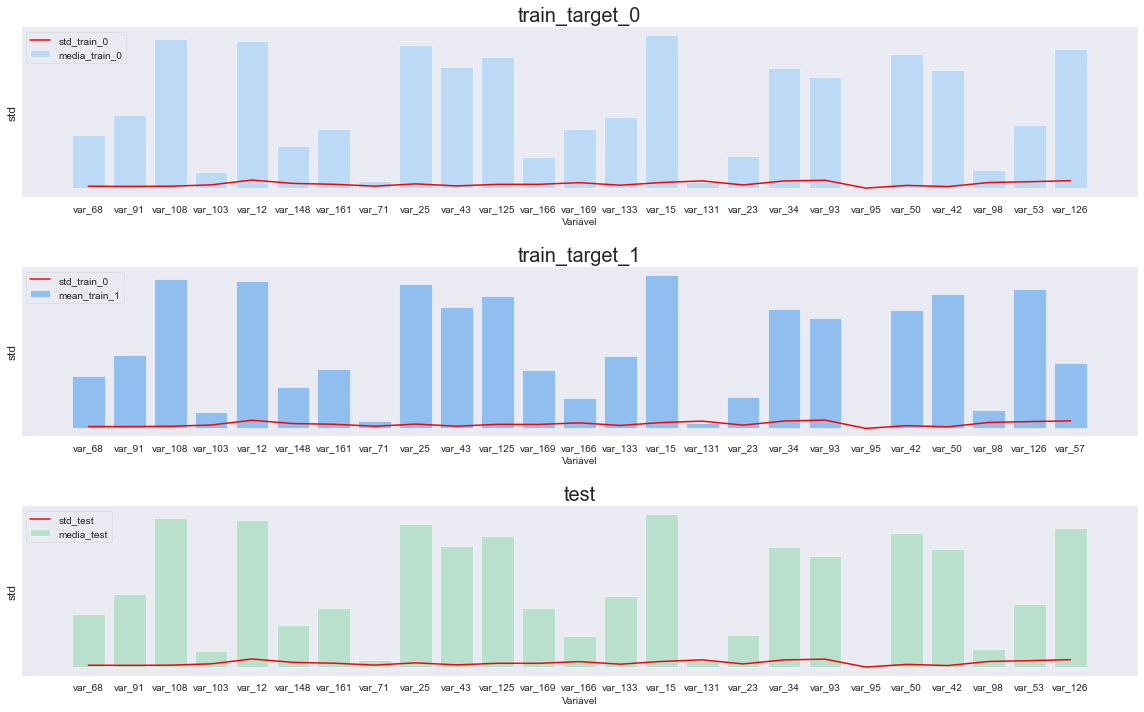

In [58]:
#plot menores std

with sns.axes_style("darkgrid"):
    
    media_train_0 = dados[dados['base']=='train_0'].sort_values(by='std', ascending=True).head(25)
    media_train_1 = dados[dados['base']=='train_1'].sort_values(by='std', ascending=True).head(25)
    media_test = dados[dados['base']=='test'].sort_values(by='std', ascending=True).head(25)
    
    f, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(16,10))#, sharex=True)

    
    sns.barplot(x="var", y="mean",data=media_train_0,label="media_train_0",color="#b3d9ff", ax = ax1)
    sns.lineplot(x="var", y="std",data=media_train_0,label="std_train_0",color="red", ax = ax1)
    ax1.set_title("train_target_0",size=20)
    ax1.set_xlabel("Variável",size=10)
    ax1.legend();
    
    sns.barplot(x="var", y="mean",data=media_train_1,label="mean_train_1",color="#80bfff", ax = ax2)
    sns.lineplot(x="var", y="std",data=media_train_1,label="std_train_0",color="red", ax = ax2)
    ax2.set_title("train_target_1",size=20)
    ax2.set_xlabel("Variável",size=10)
    ax2.legend();
    
    sns.barplot(x="var", y="mean",data=media_test,label="media_test",color="#b3e6cc", ax = ax3)
    sns.lineplot(x="var", y="std",data=media_test,label="std_test",color="red", ax = ax3)
    ax3.set_title("test",size=20)
    ax3.set_xlabel("Variável",size=10)
    ax3.legend();



    # Finalize the plot
    sns.despine(bottom=True)
    plt.setp(f.axes, yticks=[])
    plt.tight_layout(h_pad=2)
    plt.show()

## Correlação

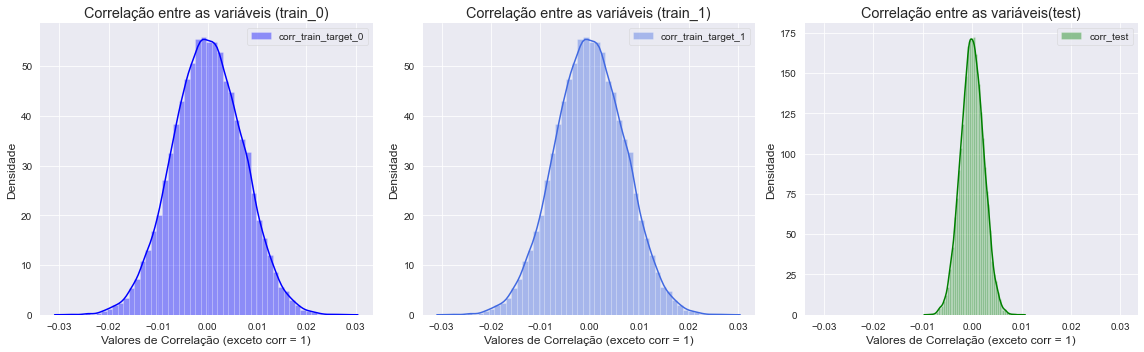

In [59]:
with sns.axes_style("darkgrid"):
    corr_train_1 = train[train['target']==1].drop(['target'], axis=1).corr()
    corr_train_1 = corr_train_1[corr_train_1 != 1]

    corr_train_0 = train[train['target']==0].drop(['target'], axis=1).corr()
    corr_train_0 = corr_train_1[corr_train_1 != 1]
    
    corr_test = test.corr()
    corr_test = corr_test[corr_test != 1]
    
    f, (ax1,ax2,ax3)= plt.subplots(1,3, figsize=(16,5), sharex=True)
    

    #plt.figure(figsize=(10,5))
    sns.distplot(corr_train_0, color="Blue", label="corr_train_target_0", ax = ax1 )    
    ax1.set_xlabel("Valores de Correlação (exceto corr = 1)")
    ax1.set_ylabel("Densidade")
    ax1.set_title("Correlação entre as variáveis (train_0)"); 
    ax1.legend();
    
    #plt.figure(figsize=(10,5))
    sns.distplot(corr_train_1, color="royalblue", label="corr_train_target_1", ax = ax2 )
    ax2.set_xlabel("Valores de Correlação (exceto corr = 1)")
    ax2.set_ylabel("Densidade")
    ax2.set_title("Correlação entre as variáveis (train_1)"); 
    ax2.legend();
    
    #plt.figure(figsize=(10,5))
    
    sns.distplot(corr_test, color="Green", label="corr_test", ax = ax3)
    ax3.set_xlabel("Valores de Correlação (exceto corr = 1)")
    ax3.set_ylabel("Densidade")
    ax3.set_title("Correlação entre as variáveis(test)"); 
    ax3.legend();
    
    sns.despine(bottom=True)
    #plt.setp(f.axes, yticks=[])
    plt.tight_layout(h_pad=2)
    plt.show()

## Outliers

In [60]:
def outliers_train():
    Q1 = train.quantile(0.25)
    Q3 = train.quantile(0.75)
    IQR = Q3 - Q1 #interquartile range (IQR)
    Z = (train < (Q1 - 1.5 * IQR))|(train > (Q3 + 1.5 * IQR))
    outliers_train = Z[Z[Z.columns.values]==True].count()
    outliers_train = pd.DataFrame(outliers_train)
    outliers_train = outliers_train.reset_index()
    outliers_train = outliers_train.rename(columns={'index':'Variavel',0:'Outliers'}).loc[1:]
    outliers_train = outliers_train.sort_values(by = ['Outliers'], ascending=False)
    outliers_train = outliers_train[outliers_train['Outliers']>0]
    return outliers_train
out_train = outliers_train()

In [61]:
def outliers_test():
    Q1 = test.quantile(0.25)
    Q3 = test.quantile(0.75)
    IQR = Q3 - Q1
    Z = (test < (Q1 - 1.5 * IQR))|(test > (Q3 + 1.5 * IQR))
    outliers_test = Z[Z[Z.columns.values]==True].count()
    outliers_test = pd.DataFrame(outliers_test)
    outliers_test = outliers_test.reset_index()
    outliers_test = outliers_test.rename(columns={'index':'Variavel',0:'Outliers'}).loc[1:]
    outliers_test = outliers_test.sort_values(by = ['Outliers'], ascending=False)
    outliers_test = outliers_test[outliers_test['Outliers']>0]
    return outliers_test
out_test = outliers_test()

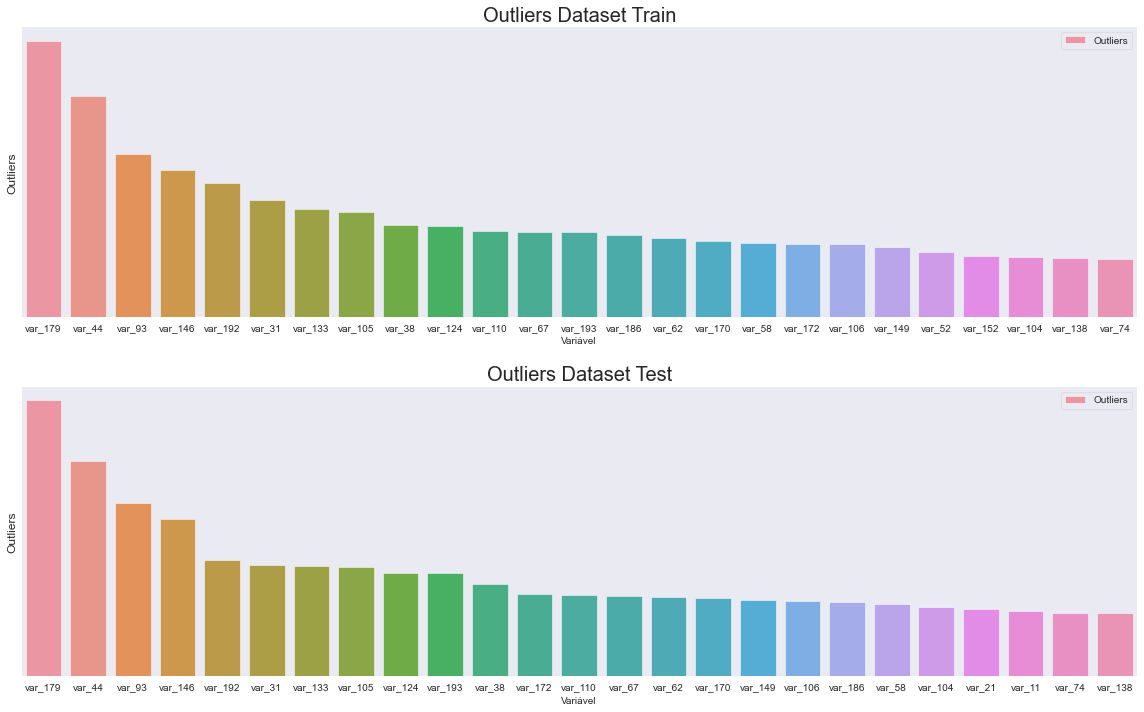

In [62]:
with sns.axes_style("darkgrid"):
    f, (ax1,ax2)= plt.subplots(2,1, figsize=(16,10))#, sharex=True)
    sns.barplot(x="Variavel", y="Outliers",data=out_train.head(25),label="Outliers", ax = ax1)
    ax1.set_title("Outliers Dataset Train",size=20)
    ax1.set_xlabel("Variável",size=10)
    ax1.legend();
    sns.barplot(x="Variavel", y="Outliers",data=out_test.head(25),label="Outliers", ax = ax2)
    ax2.set_title("Outliers Dataset Test",size=20)
    ax2.set_xlabel("Variável",size=10)
    ax2.legend();
  
    # Finalize the plot
    sns.despine(bottom=True)
    plt.setp(f.axes, yticks=[])
    plt.tight_layout(h_pad=2)
    plt.show()

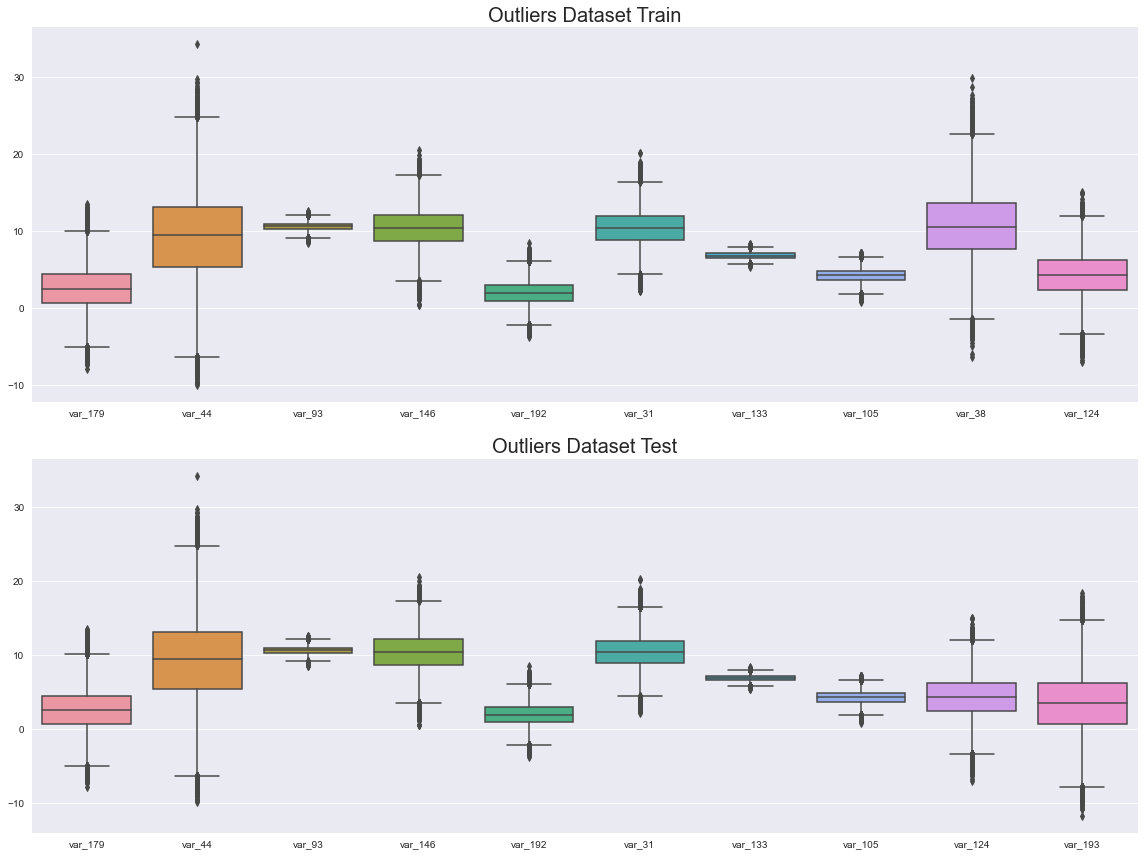

In [63]:
with sns.axes_style("darkgrid"):  
    f, (ax1,ax2)= plt.subplots(2,1,figsize = (16, 12)) #, sharex=True    
    ax1 = sns.boxplot(data=train[out_train['Variavel'].head(10).values], ax =ax1);
    ax1.set_title("Outliers Dataset Train",size=20)
    ax2 = sns.boxplot(data=train[out_test['Variavel'].head(10).values], ax =ax2);
    ax2.set_title("Outliers Dataset Test",size=20)
    sns.despine(bottom=True)
    #plt.setp(f.axes, yticks=[])
    plt.tight_layout(h_pad=2)
    plt.show()

# 5. Criação de Modelos de Machine Learning

## 5.1 Selection Features
Considerando as caracteristicas dos dataset Train e Test, é muito difícil visualmente indicar quais as melhores variáveis para o modelo de machine learning. Utilizaremos o algoritimo de Regressão Logistica. Para melhor resultado aplicaremos normalização nos dataset Train e Test.

https://scikit-learn.org/stable/modules/preprocessing.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

In [15]:
#dados de treinamento do modelo
data1 = train[train['target']== 1].sample(6000)
data2 = train[train['target']== 0].sample(14000)
dados_treino = data1.append(data2)
dados_treino = dados_treino.sample(10000)
scaler = StandardScaler()
data_scaler = scaler.fit_transform(dados_treino.iloc[:,1:])
data = np.column_stack((dados_treino.iloc[:,0:1].values,data_scaler))
dados_treino = pd.DataFrame(data, columns=dados_treino.iloc[:,0:].columns.values)

In [16]:
#dados para testar o modelo.
dados_teste = train.sample(100000)
data_scaler = scaler.fit_transform(dados_teste.iloc[:,1:])
data_scaler = np.column_stack((dados_teste.iloc[:,0:1].values,data_scaler))
dados_teste = pd.DataFrame(data_scaler, columns=train.iloc[:,0:].columns.values)

In [17]:
# vamos selecionar as 100 melhores variáveis.
estimator = LogisticRegression()
selector_feature = RFE(estimator, n_features_to_select=100, step=2)
selector_feature = selector_feature.fit(dados_treino.drop("target", axis = 1), dados_treino.target)
feature = np.column_stack((dados_treino.columns[1:].values,selector_feature.support_))
feature = np.column_stack((feature,selector_feature.ranking_))
feature = pd.DataFrame(feature)
feature = feature.rename(columns={0:'Feature',1:'Selection',2:'Ranking'})

In [18]:
#Variáveis descartadas
feature.loc[feature['Selection'] == False, ['Feature','Ranking']].sort_values(
    by ='Ranking', ascending=True).head(20)

,Feature,Ranking
199,var_199,2
104,var_104,2
119,var_119,3
45,var_45,3
8,var_8,4
141,var_141,4
116,var_116,5
125,var_125,5
85,var_85,6
156,var_156,6


In [19]:
#Variáveis selecionadas
features = feature.loc[feature['Selection'] == True, ['Feature']].T.values[0]
features

array(['var_0', 'var_1', 'var_2', 'var_5', 'var_6', 'var_9', 'var_11',
       'var_12', 'var_13', 'var_18', 'var_21', 'var_22', 'var_23',
       'var_24', 'var_26', 'var_28', 'var_31', 'var_32', 'var_33',
       'var_34', 'var_35', 'var_36', 'var_40', 'var_44', 'var_48',
       'var_51', 'var_53', 'var_56', 'var_58', 'var_63', 'var_67',
       'var_68', 'var_70', 'var_71', 'var_75', 'var_76', 'var_77',
       'var_78', 'var_80', 'var_81', 'var_82', 'var_83', 'var_86',
       'var_87', 'var_89', 'var_91', 'var_92', 'var_93', 'var_94',
       'var_95', 'var_99', 'var_105', 'var_106', 'var_107', 'var_108',
       'var_109', 'var_110', 'var_115', 'var_118', 'var_121', 'var_122',
       'var_123', 'var_127', 'var_128', 'var_130', 'var_131', 'var_133',
       'var_139', 'var_145', 'var_146', 'var_147', 'var_148', 'var_149',
       'var_150', 'var_154', 'var_155', 'var_157', 'var_162', 'var_163',
       'var_164', 'var_165', 'var_166', 'var_169', 'var_170', 'var_172',
       'var_173', 'var_1

In [20]:
#dados para treinamento do modelo
X = dados_treino[features].values
y = dados_treino['target'].values

#dados para Teste do modelo
A = dados_teste[features].values
b = dados_teste['target'].values

### K-Fold cross-validation - Validação dos modelos
K-fold é o método de cross-validation mais conhecido e utilizado. O método consiste em dividir o dataset em k partes, usando k-1 partes para treino e a parte remanescente para teste, fazendo isso k vezes. Em cada uma das k vezes, testa-se o modelo com um fold diferente calculando a métrica escolhida para avaliação do modelo. Ao final do processo, teremos k medidas da métrica de avaliação escolhida, com as quais geralmente calculamos a média e o desvio-padrão. 
https://medium.com/data-hackers/como-criar-k-fold-cross-validation-na-m%C3%A3o-em-python-c0bb06074b6b

In [21]:
num_folds=5
Kfold = StratifiedKFold(num_folds,n_splits = 3, shuffle = True)

## 5.2 Comparação entre diferentes algoritmos/modelos

### Modelos de Machine Learning

In [22]:
models = []
models.append(('LogisticRegression', LogisticRegression(n_jobs = 8)))
models.append(('SVC', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier(max_depth=2,n_estimators=100, min_samples_split=2,
                                                                min_samples_leaf=3,n_jobs=-1)))
models.append(('LinearSVC', LinearSVC(C=0.01, penalty="l1", dual=False)))
models.append(('GaussianNB',GaussianNB(var_smoothing=0.01)))
models.append(('KNeighborsClassifier', KNeighborsClassifier(n_jobs=8)))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=200,  learning_rate=1.0, 
                                max_depth=2, random_state=0)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=2)))
models.append(('XGBClassifier', xgb.XGBClassifier(
base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=5, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, subsample=1
)))



### Comparação entre diferentes algoritmos/modelos

In [23]:
def treina_modelos(X,y, A,b, model, name):  
    resultado = cross_val_score(model, X,y, cv=Kfold, scoring='accuracy')

    print("-------------------------------------------------------------------")
    print("                    %s" % name)
    print("-------------------------------------------------------------------")
    print("")
    print("")
    print("-------------------------------------------------------------------")
    print("     Cross-validation do modelo %s" % (name))
    print("-------------------------------------------------------------------")
    print("")
    print("Acurária - cross-validation:%.3f"%(resultado.mean()*100))
    print('Intervalo de acurácia - cross-validation: [{:.2f}% ~ {:.2f}%]'
           .format((resultado.mean() - 1.5*resultado.std())*100, 
                   (resultado.mean() + 1.5*resultado.std())*100))
    print("")
    print("")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    #treinando o modelo
    model.fit(X_train, y_train)
    #testando o modelos
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------------")
    print("     Resultado do treinando do modelo %s" % (name))
    print("-------------------------------------------------------------------")
    print("")
    print (classification_report(y_test, y_pred))
    print("")
    print("")
    print("A acurácia do modelo é:%s" % (accuracy_score(y_test, y_pred)))
    print("")
    print("")
    print("                    Confusion Matrix")
    print("")
    print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))
    print("")
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
    plt.show()
    print("")
    print("-------------------------------------------------------------------")
    print("     Teste do modelo com novos dados")
    print("-------------------------------------------------------------------")
    print("")
    b_pred = model.predict(A)
    print("")
    print (classification_report(b, b_pred))
    print("")
    print("A acurácia do modelo é:%s" % (accuracy_score(b, b_pred)))
    print("")
    print("")
    plot_confusion_matrix(model, A, b,cmap=plt.cm.Blues)
    plt.show()
   

In [24]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

-------------------------------------------------------------------
                    LogisticRegression
-------------------------------------------------------------------


-------------------------------------------------------------------
     Cross-validation do modelo LogisticRegression
-------------------------------------------------------------------

Acurária - cross-validation:80.930
Intervalo de acurácia - cross-validation: [80.00% ~ 81.86%]


-------------------------------------------------------------------
     Resultado do treinando do modelo LogisticRegression
-------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      2064
         1.0       0.73      0.60      0.66       936

    accuracy                           0.81      3000
   macro avg       0.78      0.75      0.76      3000
weighted avg       0.80      0.81      0.80      3000



A acurácia do m

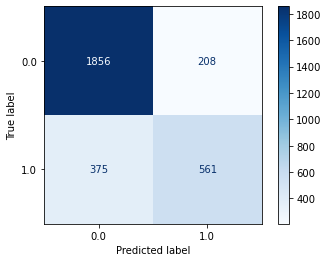


-------------------------------------------------------------------
     Teste do modelo com novos dados
-------------------------------------------------------------------


              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89     89994
         1.0       0.31      0.69      0.42     10006

    accuracy                           0.81    100000
   macro avg       0.63      0.76      0.66    100000
weighted avg       0.89      0.81      0.84    100000


A acurácia do modelo é:0.81437




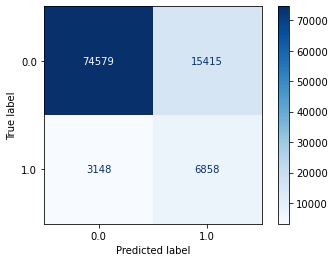

-------------------------------------------------------------------
                    SVC
-------------------------------------------------------------------


-------------------------------------------------------------------
     Cross-validation do modelo SVC
-------------------------------------------------------------------

Acurária - cross-validation:82.020
Intervalo de acurácia - cross-validation: [81.06% ~ 82.98%]


-------------------------------------------------------------------
     Resultado do treinando do modelo SVC
-------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      2083
         1.0       0.77      0.60      0.67       917

    accuracy                           0.82      3000
   macro avg       0.80      0.76      0.78      3000
weighted avg       0.82      0.82      0.82      3000



A acurácia do modelo é:0.8226666666666667


                

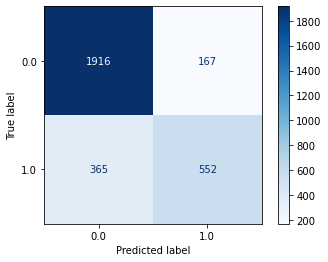


-------------------------------------------------------------------
     Teste do modelo com novos dados
-------------------------------------------------------------------


              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90     89994
         1.0       0.35      0.72      0.47     10006

    accuracy                           0.84    100000
   macro avg       0.66      0.79      0.69    100000
weighted avg       0.90      0.84      0.86    100000


A acurácia do modelo é:0.83604




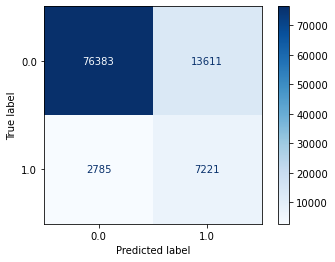

-------------------------------------------------------------------
                    RandomForestClassifier
-------------------------------------------------------------------


-------------------------------------------------------------------
     Cross-validation do modelo RandomForestClassifier
-------------------------------------------------------------------

Acurária - cross-validation:69.470
Intervalo de acurácia - cross-validation: [69.43% ~ 69.51%]


-------------------------------------------------------------------
     Resultado do treinando do modelo RandomForestClassifier
-------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82      2103
         1.0       0.00      0.00      0.00       897

    accuracy                           0.70      3000
   macro avg       0.35      0.50      0.41      3000
weighted avg       0.49      0.70      0.58      3000



A a

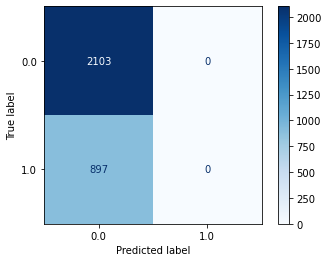


-------------------------------------------------------------------
     Teste do modelo com novos dados
-------------------------------------------------------------------


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     89994
         1.0       0.00      0.00      0.00     10006

    accuracy                           0.90    100000
   macro avg       0.45      0.50      0.47    100000
weighted avg       0.81      0.90      0.85    100000


A acurácia do modelo é:0.89994




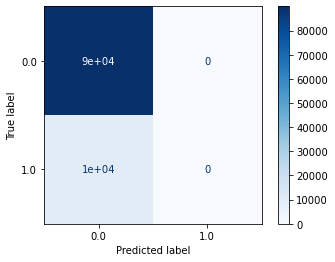

-------------------------------------------------------------------
                    LinearSVC
-------------------------------------------------------------------


-------------------------------------------------------------------
     Cross-validation do modelo LinearSVC
-------------------------------------------------------------------

Acurária - cross-validation:80.930
Intervalo de acurácia - cross-validation: [79.87% ~ 81.99%]


-------------------------------------------------------------------
     Resultado do treinando do modelo LinearSVC
-------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      2120
         1.0       0.74      0.55      0.63       880

    accuracy                           0.81      3000
   macro avg       0.78      0.74      0.75      3000
weighted avg       0.80      0.81      0.80      3000



A acurácia do modelo é:0.8106666666666666


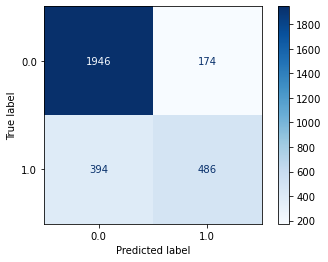


-------------------------------------------------------------------
     Teste do modelo com novos dados
-------------------------------------------------------------------


              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90     89994
         1.0       0.33      0.66      0.44     10006

    accuracy                           0.83    100000
   macro avg       0.64      0.75      0.67    100000
weighted avg       0.89      0.83      0.85    100000


A acurácia do modelo é:0.82879




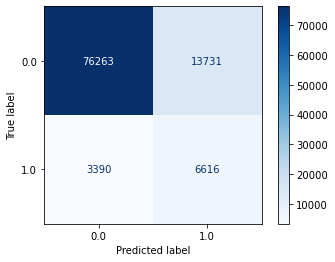

-------------------------------------------------------------------
                    GaussianNB
-------------------------------------------------------------------


-------------------------------------------------------------------
     Cross-validation do modelo GaussianNB
-------------------------------------------------------------------

Acurária - cross-validation:82.770
Intervalo de acurácia - cross-validation: [81.98% ~ 83.56%]


-------------------------------------------------------------------
     Resultado do treinando do modelo GaussianNB
-------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      2060
         1.0       0.79      0.61      0.68       940

    accuracy                           0.83      3000
   macro avg       0.81      0.77      0.78      3000
weighted avg       0.82      0.83      0.82      3000



A acurácia do modelo é:0.82533333333333

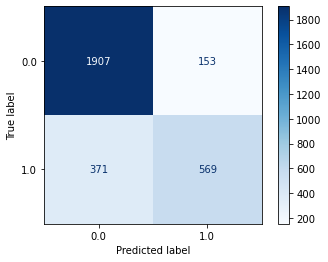


-------------------------------------------------------------------
     Teste do modelo com novos dados
-------------------------------------------------------------------


              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90     89994
         1.0       0.34      0.72      0.46     10006

    accuracy                           0.83    100000
   macro avg       0.65      0.78      0.68    100000
weighted avg       0.90      0.83      0.86    100000


A acurácia do modelo é:0.83235




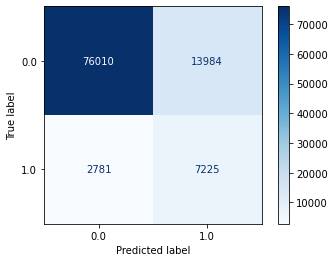

-------------------------------------------------------------------
                    KNeighborsClassifier
-------------------------------------------------------------------


-------------------------------------------------------------------
     Cross-validation do modelo KNeighborsClassifier
-------------------------------------------------------------------

Acurária - cross-validation:70.330
Intervalo de acurácia - cross-validation: [69.71% ~ 70.95%]


-------------------------------------------------------------------
     Resultado do treinando do modelo KNeighborsClassifier
-------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.71      0.99      0.83      2093
         1.0       0.81      0.09      0.16       907

    accuracy                           0.72      3000
   macro avg       0.76      0.54      0.49      3000
weighted avg       0.74      0.72      0.63      3000



A acuráci

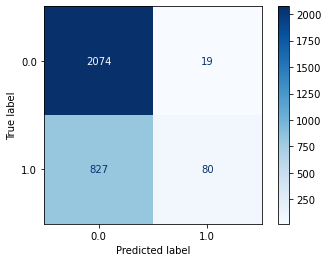


-------------------------------------------------------------------
     Teste do modelo com novos dados
-------------------------------------------------------------------


              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     89994
         1.0       0.33      0.10      0.15     10006

    accuracy                           0.89    100000
   macro avg       0.62      0.54      0.55    100000
weighted avg       0.85      0.89      0.86    100000


A acurácia do modelo é:0.88908




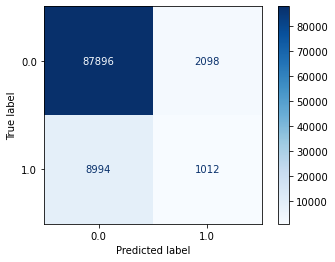

-------------------------------------------------------------------
                    LinearDiscriminantAnalysis
-------------------------------------------------------------------


-------------------------------------------------------------------
     Cross-validation do modelo LinearDiscriminantAnalysis
-------------------------------------------------------------------

Acurária - cross-validation:80.940
Intervalo de acurácia - cross-validation: [80.22% ~ 81.66%]


-------------------------------------------------------------------
     Resultado do treinando do modelo LinearDiscriminantAnalysis
-------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      2083
         1.0       0.74      0.58      0.65       917

    accuracy                           0.81      3000
   macro avg       0.78      0.74      0.76      3000
weighted avg       0.80      0.81      0.80     

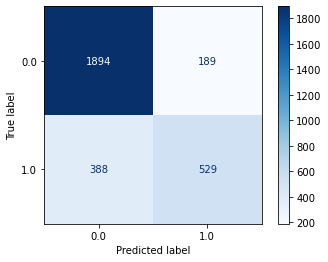


-------------------------------------------------------------------
     Teste do modelo com novos dados
-------------------------------------------------------------------


              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89     89994
         1.0       0.31      0.68      0.42     10006

    accuracy                           0.81    100000
   macro avg       0.63      0.76      0.66    100000
weighted avg       0.89      0.81      0.84    100000


A acurácia do modelo é:0.81449




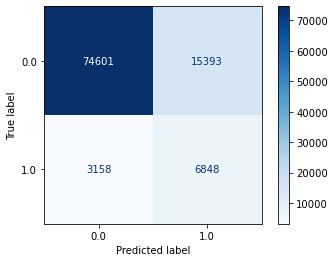

-------------------------------------------------------------------
                    GradientBoostingClassifier
-------------------------------------------------------------------


-------------------------------------------------------------------
     Cross-validation do modelo GradientBoostingClassifier
-------------------------------------------------------------------

Acurária - cross-validation:78.180
Intervalo de acurácia - cross-validation: [76.49% ~ 79.87%]


-------------------------------------------------------------------
     Resultado do treinando do modelo GradientBoostingClassifier
-------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      2078
         1.0       0.66      0.60      0.63       922

    accuracy                           0.78      3000
   macro avg       0.74      0.73      0.74      3000
weighted avg       0.78      0.78      0.78     

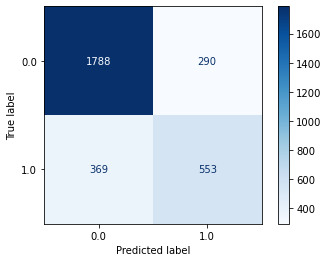


-------------------------------------------------------------------
     Teste do modelo com novos dados
-------------------------------------------------------------------


              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87     89994
         1.0       0.28      0.71      0.40     10006

    accuracy                           0.79    100000
   macro avg       0.62      0.75      0.63    100000
weighted avg       0.89      0.79      0.82    100000


A acurácia do modelo é:0.78555




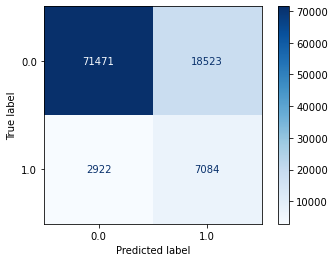

-------------------------------------------------------------------
                    DecisionTreeClassifier
-------------------------------------------------------------------


-------------------------------------------------------------------
     Cross-validation do modelo DecisionTreeClassifier
-------------------------------------------------------------------

Acurária - cross-validation:69.550
Intervalo de acurácia - cross-validation: [69.21% ~ 69.89%]


-------------------------------------------------------------------
     Resultado do treinando do modelo DecisionTreeClassifier
-------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.81      2051
         1.0       0.62      0.01      0.02       949

    accuracy                           0.69      3000
   macro avg       0.66      0.50      0.42      3000
weighted avg       0.67      0.69      0.56      3000



A a

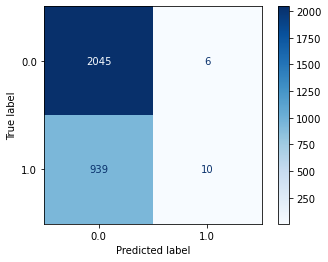


-------------------------------------------------------------------
     Teste do modelo com novos dados
-------------------------------------------------------------------


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     89994
         1.0       0.29      0.01      0.03     10006

    accuracy                           0.90    100000
   macro avg       0.60      0.50      0.49    100000
weighted avg       0.84      0.90      0.85    100000


A acurácia do modelo é:0.89807




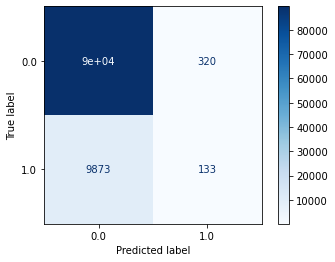

-------------------------------------------------------------------
                    XGBClassifier
-------------------------------------------------------------------


-------------------------------------------------------------------
     Cross-validation do modelo XGBClassifier
-------------------------------------------------------------------

Acurária - cross-validation:78.940
Intervalo de acurácia - cross-validation: [78.18% ~ 79.70%]


-------------------------------------------------------------------
     Resultado do treinando do modelo XGBClassifier
-------------------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      2057
         1.0       0.77      0.41      0.54       943

    accuracy                           0.78      3000
   macro avg       0.77      0.68      0.69      3000
weighted avg       0.78      0.78      0.75      3000



A acurácia do modelo é:0.77633

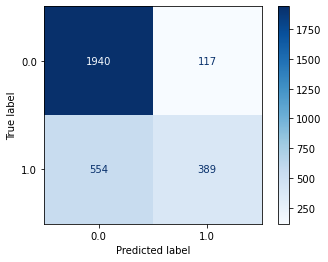


-------------------------------------------------------------------
     Teste do modelo com novos dados
-------------------------------------------------------------------


              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93     89994
         1.0       0.41      0.56      0.47     10006

    accuracy                           0.88    100000
   macro avg       0.68      0.73      0.70    100000
weighted avg       0.89      0.88      0.88    100000


A acurácia do modelo é:0.8752




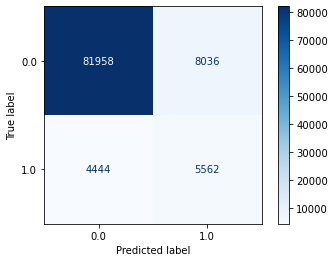

In [25]:
for name, model in models: 
    treina_modelos(X,y,A,b,model,name)

## Aplicação do modelo XGBClassifier no Dataset Test

In [117]:
#dados para testar o modelo.
dados_test = test
data_scaler = scaler.fit_transform(dados_test.iloc[:,1:])
data_scaler = np.column_stack((dados_test.iloc[:,0:1].values,data_scaler))
dados_test = pd.DataFrame(data_scaler, columns=test.iloc[:,0:].columns.values)

In [118]:
# Algoritmo que será treinado é o XGBClassifier
model = xgb.XGBClassifier(
base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=5, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, subsample=1)

In [119]:
#selecionando varias variáveis
X1 = dados_test[features].values

#Treina o Modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model.fit(X_train, y_train)

#Realiza as predições
y_pred = model.predict(X1)
X1_predicao = pd.DataFrame(y_pred).rename(columns={0:'target'})

#Aplica as predições ao Dataset Train
test = pd.merge(test.reset_index(), X1_predicao, left_index=True, right_index=True)

In [120]:
#verificando o balanceamento do Dataset
count_class_0, count_class_1 = test.target.value_counts()
print("Quantidade de linhas no dataset Test com target = 0 : %s" % 
      (count_class_0))
print("Quantidade de linhas no dataset Test com target = 1 : %s" % 
      (count_class_1))
print("Percentual de linhas no dataset Test com target = 0 : %s" % 
      ((count_class_0  / (count_class_1 + count_class_0) * 100)))
print("Percentual de linhas no dataset Test com target = 1 : %s" % 
      ((count_class_1  / (count_class_1 + count_class_0) * 100)))


Quantidade de linhas no dataset Test com target = 0 : 161503
Quantidade de linhas no dataset Test com target = 1 : 38497
Percentual de linhas no dataset Test com target = 0 : 80.7515
Percentual de linhas no dataset Test com target = 1 : 19.2485


Text(0, 0.5, 'Quantidade')

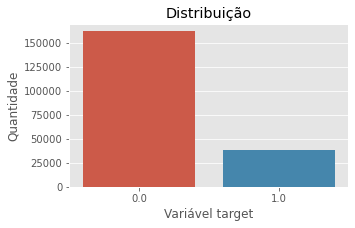

In [121]:
#Plot da distribuição da variável target
plt.style.use("ggplot")
plt.figure(figsize = (5, 3))
sns.countplot('target', data=test);
plt.title("Distribuição")
plt.xlabel("Variável target")
plt.ylabel("Quantidade")